In [1]:
from bitarray import bitarray
import mmh3
import random
import numpy as np
import math
import sklearn.preprocessing

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 
import pandas as pd


In [3]:
b = datasets.load_breast_cancer()
X = b.data  
y = b.target
print(X.shape)

(569, 30)


In [4]:
x_neg_0=np.zeros(212)
x_pos_0=np.ones(357)

In [5]:
#first two classes positive, rest negative
x_neg=X[y==0]
x_pos=X[y==1]
print(x_neg.shape)
print(x_pos.shape)

(212, 30)
(357, 30)


In [6]:
x_negt = np.insert(x_neg, 30, x_neg_0, axis=1)
x_post = np.insert(x_pos, 30, x_pos_0, axis=1)

In [7]:
x_train = np.concatenate((x_post, x_negt)).reshape(-1, 31)
y_train = y.reshape(-1, 1).astype(int)
print(x_train.shape)

(569, 31)


In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

x_train


array([[-0.16679919, -1.1471623 , -0.18572799, ...,  0.12334653,
        -0.62929189,  0.77060855],
       [-0.29744572, -0.83300824, -0.26110605, ...,  0.45822712,
        -0.11724974,  0.77060855],
       [-1.31308049, -1.59395919, -1.30280622, ..., -0.72922385,
        -0.34445459,  0.77060855],
       ...,
       [ 1.70485436,  2.08513394,  1.61593137, ..., -0.53185462,
        -0.97397828, -1.29767572],
       [ 0.70228425,  2.0455738 ,  0.67267578, ..., -1.10454895,
        -0.31840916, -1.29767572],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  1.91908301,
         2.21963528, -1.29767572]])

# Bloom Filter

In [9]:
class BloomFilter:
    
    def __init__(self, size, model): #hash count is 1
        self.size = size
      #  self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        self.model=model #classifier model associated as hash function
        
    def add(self, num):
        result=math.floor(model.predict(num)[0]*(self.size-1))    
        self.bit_array[result] = 1
            
    def lookup(self, num):
        #for seed in range(1,self.hash_count+1):
            #result = mmh3.hash(str(num), seed) % self.size
        result=math.floor(self.model.predict(num)[0]*(self.size-1))    
        if self.bit_array[result] == 0:
                return False
        return True

    def add_init(self,x_train,y_train):
        pred = self.model.predict_proba(x_train)
        pred=pred[:,1]
        pred=pred.reshape(-1,1)
        for i in range(len(pred)):
            if(y_train[i]==1):
                result = math.floor(pred[i][0]*(self.size-1))
                self.bit_array[result] = 1
    
    def predict(self,x):
        initpred = self.model.predict_proba(x)
        initpred=initpred[:,1]
        initpred=initpred.reshape(-1,1)
        indexes = []
        for i in range(len(initpred)):
            indexes += [math.floor(initpred[i][0]*(bf.size-1))]
        pred = []
        for i in indexes:
            pred += [self.bit_array[i]]
        return np.array(pred)

#(Input:bloom filter,number array,ratio; Output:(-1) for false negative, otherwise fpr)
def fpr_kraska_hash(bf,x,y):
    pred = bf.predict(x)
    pred=pred.reshape(-1,1)
    tn, fp, fn, tp = confusion_matrix(y, pred,labels=[False,True]).ravel() 
    return fp/(fp+tn)

#(Input:bloom filter size, total random numbers, ratio of number inserted; Output:efficient number of hash functions)
def eff_k(m,n,r):
    k=int(m/(int(n*r))*math.log(2))
    if(k==0):
        return 1
    return k


def fpr_test(x,bf,y):
    pred=bf.predict(x)
    fp=0
    tn=0
    for i in range(len(pred)):
        if((pred[i]==1)and(y[i]==0)):
            fp+=1
        if((pred[i]==0) and (y[i]==0)):
            tn+=1
        if((pred[i]==0) and (y[i]==1)):
            return -1
    print(fp)
    print(tn)
    return fp/(fp+tn)
def outputs(m,n,r):
    find_fpr(m,model,n,r)
    #print("For m=%d, k=%d, n=%d, r=%.3f: fpr=%.3f"%(m,k,n,r,find_fpr(m,k,n,r)))

# Logistic Regression Model

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=10.0,random_state = 10,max_iter=100)
classifier.fit(x_train, y_train)

/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred = classifier.predict(x_train)
print(y_pred)

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0
 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [15]:
prob=classifier.predict_proba(x_train)
print(prob[:,1])

[0.53203962 0.62494032 0.5714533  0.41179128 0.70748957 0.52173282
 0.50585006 0.50058937 0.55968037 0.60274624 0.52211725 0.52115357
 0.73207947 0.6395875  0.5648611  0.62242292 0.60204802 0.60164857
 0.61692114 0.53492985 0.51996189 0.51000983 0.47331036 0.57239873
 0.55144783 0.45095305 0.52979598 0.53054779 0.42730154 0.55544301
 0.49208285 0.52660511 0.45532732 0.42343542 0.63000293 0.72148551
 0.54151784 0.67387314 0.66399143 0.4976828  0.57291434 0.61018429
 0.57186577 0.43052254 0.60189134 0.59302734 0.63013743 0.60374885
 0.63764548 0.61230494 0.49436321 0.53614962 0.58992784 0.57321386
 0.54178805 0.52371845 0.34858715 0.53244452 0.47440714 0.63818835
 0.58283904 0.58961193 0.5555968  0.61634502 0.46406846 0.4662321
 0.52853867 0.57337457 0.63414305 0.79180473 0.60170167 0.47056005
 0.56698112 0.43120701 0.56310749 0.5771749  0.54120485 0.55556427
 0.50097871 0.64710825 0.54076966 0.56262859 0.4655196  0.60119203
 0.65687897 0.49437651 0.54355159 0.50482872 0.52874574 0.58082

In [16]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_train, y_pred))

Accuracy :  0.6502636203866432


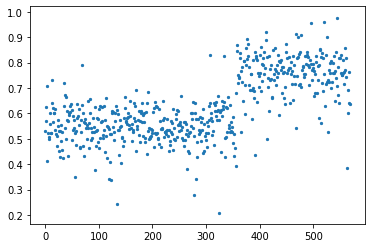

In [17]:
preds =prob[:,1]
plt.scatter(np.arange(len(preds)), preds, s=5)

In [26]:
m=5000

In [27]:
bf=BloomFilter(m,classifier)

In [28]:
bf.add_init(x_train,y_train)

In [29]:
print(fpr_test(x_train,bf,y_train))

33
179
0.15566037735849056


In [30]:
import pickle
import os

In [54]:
filename1='logreg_bcancer.sav'
pickle.dump(classifier,open(filename1,'wb'))

In [55]:
model_size1=os.stat('logreg_bcancer.sav').st_size

In [56]:
print(model_size1)

1072


# SVM Model

In [10]:
from sklearn import svm
from sklearn.metrics import accuracy_score 


In [11]:
clf2 = svm.SVC(kernel='rbf',probability=True)
clf2.fit(x_train, y_train)

/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [12]:
predic=clf2.predict(x_train)

In [13]:
probability=clf2.predict_proba(x_train)
print(probability[:,1])
print(probability.shape)

[0.63048782 0.62817999 0.63006003 0.64109937 0.61973903 0.62544759
 0.62643842 0.63235243 0.62542382 0.62799326 0.62908587 0.6414042
 0.6235477  0.63681049 0.62697421 0.64403377 0.62792336 0.63056653
 0.64942209 0.63280737 0.62361061 0.62409868 0.64713555 0.62637035
 0.63547683 0.63608663 0.62733897 0.63075571 0.63762662 0.62820319
 0.63095447 0.63145016 0.63168656 0.64040754 0.6228225  0.62846592
 0.62810736 0.62362154 0.62686813 0.63361881 0.6244239  0.63096092
 0.63520288 0.64698072 0.64892031 0.63995607 0.62360932 0.62891542
 0.62703593 0.62175615 0.62343148 0.62564896 0.62688734 0.64018165
 0.62896444 0.62609248 0.64242467 0.62461436 0.63138132 0.62361995
 0.63355752 0.62735909 0.63175603 0.63663161 0.65641452 0.62392422
 0.62361977 0.62947547 0.62399731 0.62360311 0.63159124 0.63161076
 0.62393261 0.62890784 0.62338594 0.6298343  0.6332614  0.64367323
 0.63311149 0.62394114 0.62960905 0.63026613 0.64149636 0.64101868
 0.6236086  0.64419329 0.6394093  0.63696685 0.62911821 0.62702

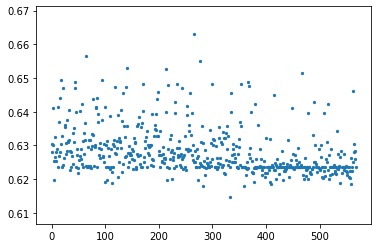

In [14]:
prob=probability[:,1]
plt.scatter(np.arange(len(prob)), prob, s=5)

In [15]:
accuracy = accuracy_score(y_train.flatten(),predic)
print(accuracy)

0.6537785588752196


In [16]:
m=50000
bf=BloomFilter(m,clf2)
bf.add_init(x_train,y_train)

In [17]:
print(fpr_test(x_train,bf,y_train))

46
166
0.2169811320754717


In [64]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [65]:
filename2='svm_bcancer.sav'
pickle.dump(clf2,open(filename2,'wb'))

In [66]:
model_size2=os.stat('svm_bcancer.sav').st_size

In [67]:
print(model_size2)

128990
